# Pendel

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#constants
g=9.81      #m/s*s
l=20        #m
goverl=g/l  #1/s*s
h=0.01 #s
h2=h/2
TT=50 #s
n=int(TT/h)

In [3]:
#visualization
def plot_phi(phi,T):
    plt.plot(T,phi,'b-')
    plt.title('Pendel')
    plt.ylabel(r'$\phi$')
    plt.xlabel('Time')
    plt.show()

In [4]:
def vec_func(vec):
    # vec(phi,spd)
    return np.array([vec[1],-goverl*np.sin(vec[0])])

In [5]:
def runge_kutta2(func,vec):
    k1 = func(vec)
    k2 = func(vec + h2*k1)
    k3 = func(vec + h2*k2)
    k4 = func(vec + h*k3)  
    return (h/6.0) * (k1 + 2*k2 + 2*k3 + k4)

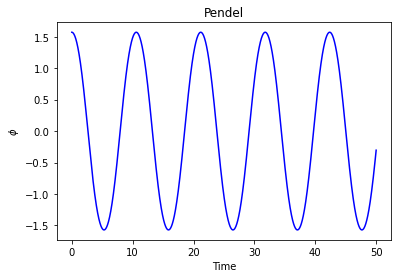

In [6]:
# vec(phi,spd)
rlt=np.zeros(2*n).reshape(n,2)
T=np.zeros(n)
rlt[0,0]=np.pi/2

for i in range(1,n):
    T[i] = T[i-1]+h
    rlt[i,:] = rlt[i-1,:] + runge_kutta2(vec_func,rlt[i-1,:])

plot_phi(rlt[:,0],T)


In [7]:
def pendel_func(phi):
    return -goverl*np.sin(phi)

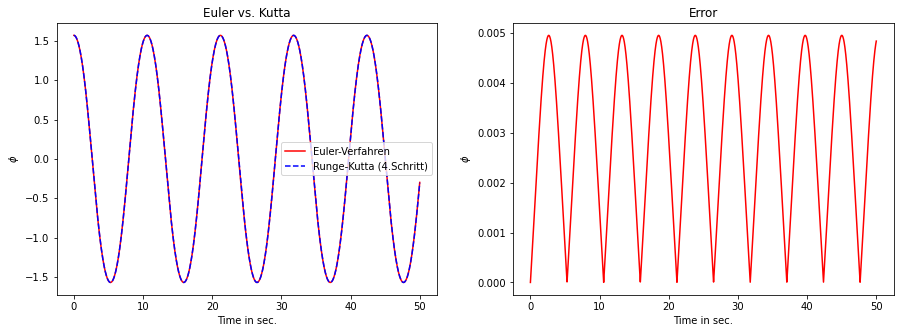

In [8]:
T=np.zeros(n)
spd=np.zeros(n)
phi=np.zeros(n)
phi[0]=np.pi/2
rlt=np.zeros(2*n).reshape(n,2)
rlt[0,0]=np.pi/2

for i in range(1,n):
    T[i] = T[i-1]+h
    spd[i] = spd[i-1] + h*pendel_func(phi[i-1])#runge_kutta(pendel_func,phi[i-1])
    phi[i] = phi[i-1] + h*spd[i]
    rlt[i,:] = rlt[i-1,:] + runge_kutta2(vec_func,rlt[i-1,:])

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
ax1.plot(T,phi,'r-',label='Euler-Verfahren')
ax1.plot(T,rlt[:,0],'b--',label='Runge-Kutta (4.Schritt)')
ax1.set_title('Euler vs. Kutta')
ax1.legend(loc='best')
ax1.set_ylabel(r'$\phi$')
ax1.set_xlabel('Time in sec.')

ax2.plot(T,np.absolute(rlt[:,0]-phi),'r-')
ax2.set_title('Error')
ax2.set_ylabel(r'$\phi$')
ax2.set_xlabel('Time in sec.')

plt.show()



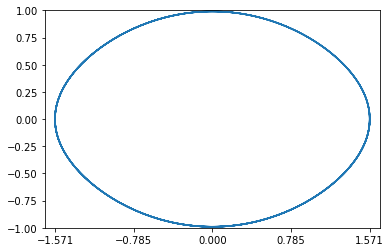

In [9]:
plt.plot(rlt[:,0],rlt[:,1])
plt.xlim((-np.pi/2)-0.1,(np.pi/2)+0.1)
plt.ylim(-1,1)
plt.xticks(np.linspace(-np.pi/2,np.pi/2,5))
plt.show()

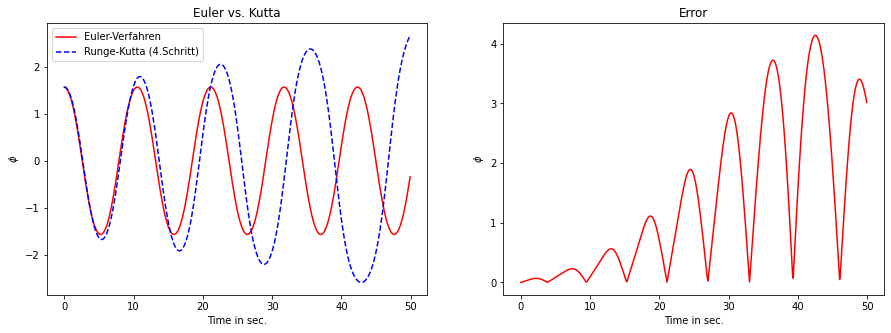

In [12]:
h=0.1
n=int(TT/h)
T=np.zeros(n)
spd=np.zeros(n)
phi=np.zeros(n)
phi[0]=np.pi/2
rlt=np.zeros(2*n).reshape(n,2)
rlt[0,0]=np.pi/2

for i in range(1,n):
    T[i] = T[i-1]+h
    spd[i] = spd[i-1] + h*pendel_func(phi[i-1])#runge_kutta(pendel_func,phi[i-1])
    phi[i] = phi[i-1] + h*spd[i]
    rlt[i,:] = rlt[i-1,:] + runge_kutta2(vec_func,rlt[i-1,:])

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
ax1.plot(T,phi,'r-',label='Euler-Verfahren')
ax1.plot(T,rlt[:,0],'b--',label='Runge-Kutta (4.Schritt)')
ax1.set_title('Euler vs. Kutta')
ax1.legend(loc='best')
ax1.set_ylabel(r'$\phi$')
ax1.set_xlabel('Time in sec.')

ax2.plot(T,np.absolute(rlt[:,0]-phi),'r-')
ax2.set_title('Error')
ax2.set_ylabel(r'$\phi$')
ax2.set_xlabel('Time in sec.')

plt.show()